In [3]:
import numpy as np

alpha = 1.5
beta = 0.05
gama = 0.48
delta = 0.05

import matplotlib.pyplot as plt 


from math import*

$\underline{\textbf{Question 1}} : $

On considère le système suivant (modèle proie/prédateur) :
$$
\left\{\begin{matrix}
\dot{x_1} = x_1(\alpha - \beta x_2)
\\ \dot{x_2} = -x_2(\gamma - \delta x_1)
\end{matrix}\right.
$$

Que l'on réécrit :
$$
\dot{x} = f(x) = \begin{pmatrix}x_1(\alpha - \beta x_2)\\ -x_2(\gamma - \delta x_1)\end{pmatrix} = \begin{pmatrix}f_1(x)\\f_2(x) \end{pmatrix}
$$

On peut interpréter les différents termes de l'équation :
- $\alpha$ est le taux de reproduction des proies
- $\beta$ quantifie le taux de mortalité des proies dû aux prédateurs
- $\gamma$ est le taux de mortalité des prédateurs
- $\delta$ est le taux de reproduction des prédateurs en fonction des proies mangées

Quant aux points d'équilibre :
On vérifie immédiatement que $\begin{pmatrix}0\\0 \end{pmatrix}$ est point d'équilibre. Puis $f(x) = 0$ avec $x \neq 0$ implique immédiatement que $\bar{x} = \begin{pmatrix}\frac{\gamma}{\delta}\\ \frac{\alpha}{\beta}\end{pmatrix}$. Alors on vérifie bien directement que $\bar{x}$ est point d'équilibre et $\bar{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

Nous allons étudier le linéarisé tangent pour voir si on peut conclure quelque chose sur la stabilité des points d'équilibre. On a :
$J_f(x) = \begin{pmatrix}\alpha - \beta x_2 & -\beta x_1\\ \delta x_2 & \gamma - \delta x_1\end{pmatrix}$, donc $J_f(0) = \begin{pmatrix}\alpha & 0 \\ 0 & \gamma \end{pmatrix}$ et $J_f(\bar{x}) = \begin{pmatrix}0 & -\beta \frac{\gamma}{\delta} \\ \delta \frac{\alpha}{\beta} & 0 \end{pmatrix}$.

Il est alors clair que le point $0$ n'est pas stable car les valeurs propres de $J_f(0)$ sont strictement positives ! Quant au point $\bar{x}$, les valeurs propres de $J_f(\bar{x})$ sont imaginaires pures car son polynôme caractéristique est $X^2 + \alpha \gamma$ avec $\alpha > 0$ et $\gamma > 0$. On ne peut donc <ins>rien conclure</ins> sur la stabilité du point $\bar{x}$ (la partie réelle des valeurs propres est nulle, il faudrait qu'elle soit strictement positive ou strictement négative si on voulait conclure quelque chose).

$\underline{\textbf{Question 2}} : $

On utilise la fonction meshgrid du module Numpy pour créer une grille de points ($x_1$, $x_2$), et pour chacun de ces points nous calculons ($\dot{x_1}$, $\dot{x_2}$). Nous utilisons ensuite la fonction quiver du module matplotlib pour afficher chaque vecteur vitesse et ainsi créer le champ de vecteurs.

La deuxième figure correspond au portrait de phase

Text(0, 0.5, 'x2')

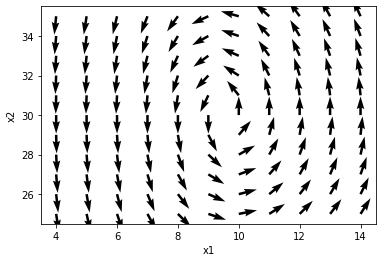

In [4]:
taille_grille = 10
xd = int(gama/delta -5)
yd = int(alpha/beta -5)
A=[i for i in range (xd, xd + taille_grille + 1)]
B=[i for i in range (yd, yd + taille_grille + 1)]
GRID = np.meshgrid(A,B)

def v(x1, x2):
    return [x1*(alpha - beta*x2), -x2*(gama - delta*x1)]

plt.figure()

for i in range (taille_grille + 1):
    for j in range (taille_grille + 1):
        v1, v2 = v(GRID[0][i][j], GRID[1][i][j])
        plt.quiver(GRID[0][i][j], GRID[1][i][j], v1, v2 )

plt.xlabel('x1')
plt.ylabel('x2')


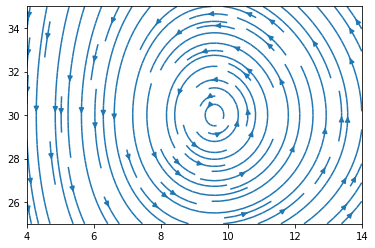

In [5]:
plt.streamplot(GRID[0], GRID[1], v(GRID[0], GRID[1])[0], v(GRID[0], GRID[1])[1]);

Il semble que les solutions tournent autour du point d'équilibre non nul

$\underline{\textbf{Question 3}} : $

Il est clair déjà que $f$ est de classe $C^1$, car sa jacobienne est continue (voir Q1 pour son expression).  Donc le théorème de Cauchy-Lipschitz assure l'existence et l'unicité d'une solution maximale au système $\left\{\begin{matrix}\dot{x} = f(x)\\ x(t_0) = x_0\end{matrix}\right.$ avec $x_0 \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

Supposons par l'absurde qu'il existe $t_1$ tel que $x_1(t_1) = 0$ par exemple (le cas $x_2(t_1) = 0$ est exactement similaire, il suffit de refaire le raisonnement ci-dessous).
Alors $x$ est solution du problème de Cauchy : $\left\{\begin{matrix}\dot{x} = f(x)\\ x(t_1) = \begin{pmatrix}
0\\ 
x_2(t_1)
\end{pmatrix}\end{matrix}\right.$

Mais on constate également que $\begin{pmatrix}
0\\ 
x_2(t_1)e^{-\gamma (t-t_1)}
\end{pmatrix}$ est solution également ! (Cela se vérifie aisément avec $f$).

Or par unicité de la solution maximale, il vient que $x(t) = \begin{pmatrix}
0\\ 
x_2(t_1)e^{-\gamma (t-t_1)}
\end{pmatrix}$, ce qui contredit le fait que $x(t_0)$ n'a aucune composante négative ou nulle ! On aboutit donc à une contradiction, donc $x_1$ ne peut s'annuler, et comme $x$ est une fonction continue, il vient que $x_1$ est nécessairement toujours strictement positive.

Donc si $x$ est initialisé dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, il y restera sur tout son intervalle de définition.

$\underline{\textbf{Question 4}} : $

On considère la fonction : $H(x_1,x_2) = \delta x_1 - \gamma ln(x_1) + \beta x_2 - \alpha ln(x_2)$. Qui est bien définie si on initialise à $x_0 \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$ d'après ce qui précède.

Calculons la dérivée temporelle de $H$ :

$\frac{dH}{dt} = \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2} = 0$ D'après le système différentiel après développement.

Donc $H$ est constante au cours du temps, ce qui assure que $x_1$ et $x_2$ sont bornées, donc elles n'explosent pas en temps fini, donc nécessairement la solution maximale est définie sur $\mathbb{R}$ tout entier !

Montrons maintenant la stabilité de $\bar{x}$. Déjà, $\lim_{\left \| x \right \|\rightarrow +\infty }H(x) = +\infty$, ce qui assure l'existence d'un $r>0$ tel que lorsque $\left \| x \right \|>r$ , on aura $H(x)>H(0) + 1$. Et comme $H$ est continue sur $\mathbb{R}^2$, elle admet un minimum sur le compact $\bar{B}_f(0,r)$ (boule fermée de rayon $r$ centrée en $0$), qui est donc un minimum global.

Ce minimum $x_m$ vérifie nécessairement $dH(x_m) = 0$, or on a $dH = \begin{pmatrix}\delta - \frac{\gamma}{x_1}, & \beta - \frac{\alpha}{x_2}\end{pmatrix}$, donc $dH(x) = 0$ implique que $x = \bar{x}$ !

$\bar{x}$ est donc l'unique minimum, montrons maintenant qu'il est strict. On calcule, pour $(k,h) \in \mathbb{R}^2-\{0\}$ :

$H(\bar{x}_1+h,\bar{x}_2+k) - H(\bar{x}_1,\bar{x}_2) = \gamma k + \beta h - \gamma ln(1+\frac{k}{\bar{x}_1}) - \alpha ln(1+\frac{h}{\bar{x}_2}) =_{(k,h)\rightarrow0} \gamma \frac{k^2}{2\bar{x}_1^2} + \alpha \frac{h^2}{2\bar{x}_2^2} > 0$ !

Donc $\bar{x}$ est bien un minimum global strict pour $H$.

Ainsi, on définit la fonction $V(x) = H(x) - H(\bar{x})$ qui vérifie les propriétés suivantes :
- $V(\bar{x}) \geq 0$ avec égalité si et seulement si $x=\bar{x}$
- Et $\langle \nabla V(x(t)),f(x(t))\rangle = \frac{dV}{dx}(x(t)) \times \dot{x}(t) = \frac{dV}{dt} = 0$

$V$ est donc une fonction de Lyapunov pour le point $\bar{x}$ ! Par la caractérisation de Lyapunov, nous pouvons enfin affirmer que le point $\bar{x}$ est stable.

$\underline{\textbf{Question 5}} : $

Pour réaliser les courbes de niveau de $H$, on réutilise les fonctions créées dans le cadre du premier projet numérique, notamment la fonction display_contour

<Figure size 720x720 with 0 Axes>

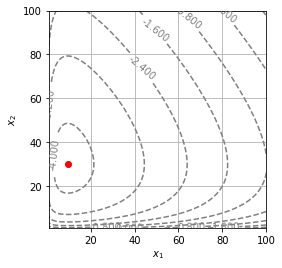

In [6]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    

def H(x1, x2):
    return delta * x1 - gama *np.log(x1) + beta*x2 - alpha*np.log(x2)


plt.figure(figsize=(10,10))
x1 = np.linspace(1, 100, 1001)
x2 = np.linspace(1, 100, 1001)
display_contour(H, x1, x2, levels=10)
plt.plot(gama/delta, alpha/beta, 'ro' )

On s'aperçoit que $\bar{x}$ est au centre des lignes de niveau, au point le plus bas des valeurs prises par $H$.
$\bar{x}$ est donc un point d'équilibre stable  

$\underline{\textbf{Question 6}} : $

Mettre en place un schéma d'Euler explicite consiste à approximer, pour une équation différentielle $\dot{x} = f(x,t)$,
$x(t_{j+1})$ pour une certaine échelle de temps avec un pas $dt$ par :
$x^{j+1} = x^j + dtf(x^j, t^j)$

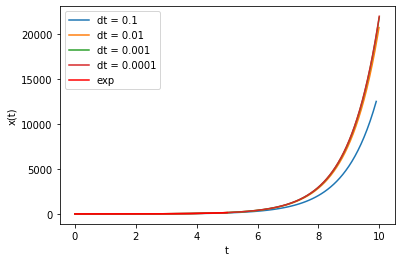

In [34]:
def solve_euler_explicite(f, x0, dt, t0, tf):
    x = [x0]
    T = np.arange(t0, tf , dt)
    for t in T[:-1] :
        x.append(x[-1] + dt*f(x[-1], t))
    return x, T


def f1(x, t):
    return x


liste_dt = [ 0.1, 0.01, 0.001, 0.0001]

for dt in liste_dt :
    x1, t1 = solve_euler_explicite(f1, 1, dt, 0, 10)
    plt.plot(t1, x1, label = f"dt = {dt}")

t2 = np.linspace(0, 5, 1000)
plt.plot(t2, np.exp(t2), 'r', label = 'exp')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend();

On remarque qu'on écrit le schéma d'Euler explicite à l'aide du module numpy : Ainsi, il peut être appliqué à des équations de n'importe quelle dimension.
Pour tester notre solveur, on utilise l'équation différentielle bien connue $\dot{x}$ = $x$ , car on sait que la solution de ce système est de la forme $x(t)$ = $\lambda$$e^{t}$, avec ici $x(0) = 1$, $x(t)$ = $e^{t}$

Le schéma d'Euler explicite converge bien vers la solution exacte (ici en rouge). L'erreur pour un tel schéma est de l'ordre théoriquement de $dt$. En effet, en définissant l'erreur $\eta^{j+1} = \frac{x(t_{j+1}) - (x(t_j) + f(t_j, x(t_j)))}{dt}$, on obtient $\begin{Vmatrix}
\eta^{j+1}
\end{Vmatrix}
<=cdt$

Nous allons vérifier cela en traçant l'erreur en fonction de dt pour une collection de pas de temps :

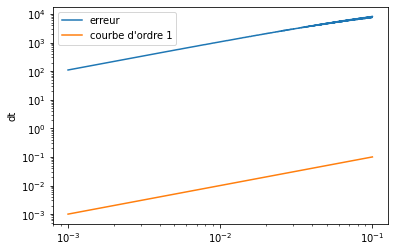

In [60]:
list_dt = np.arange(1e-3, 1e-1, 1e-4)
erreur = []
for dt in list_dt : 
    xerr, terr = solve_euler_explicite(f1, 1, dt, 0, 10)
    erreur.append(max(abs(xerr - np.exp(terr))))
plt.loglog(list_dt, erreur, label = 'erreur')
plt.loglog(list_dt, list_dt, label = "courbe d'ordre 1")
plt.ylabel('dt')
plt.legend();

On a bien une erreur majorée par $cdt$

$\underline{\textbf{Question 7}} : $

In [37]:
def lotka(x, t):
    return np.array([x[0]*(alpha- beta*x[1]), -x[1]*(gama - delta*x[0])])

x, t = solve_euler_explicite(lotka, np.array([50, 15]), 0.01, 0, 150)

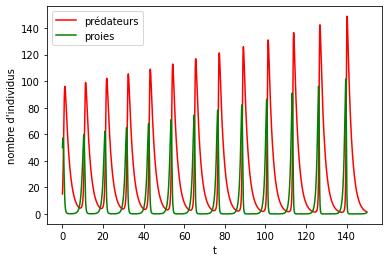

In [38]:
proies = np.array([X[0] for X in x])
prédateurs = np.array([X[1] for X in x])
plt.plot(t, prédateurs, 'r', label = 'prédateurs')
plt.plot(t, proies, 'g', label = 'proies')
plt.xlabel('t')
plt.ylabel("nombre d'individus")
plt.legend();

 

In [39]:
proies

array([50.        , 50.375     , 50.74518069, ...,  0.98854567,
        1.00259063,  1.01683856])

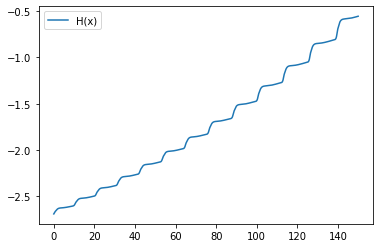

In [40]:
plt.plot(t, H(proies, prédateurs), label = 'H(x)')
plt.legend();

On remarque que les populations évoluent de manière cyclique. Cela semble logique : lorsqu'il y a beaucoup de proies, les prédateurs peuvent se nourrir, augmenter leur population tout en diminuant celle des proies ; à l'inverse, lorsqu'il y a peu de prédateurs, les proies peuvent de nouveau prospérer.

$\underline{\textbf{Question 8}} : $

Mettre en place un schéma d'Euler implicite cette fois consiste à approximer, pour une équation différentielle $\dot{x} = f(x,t)$,
$x(t_{j+1})$ pour une certaine échelle de temps avec un pas $dt$ par :
$x^{j+1} = x^j + dtf(x^{j+1}, t^{j+1})$. Cela nécessite donc de résoudre l'équation à chaque itération car nous ne connaissons pas $f(x^{j+1}, t^{j+1})$, c'est pourquoi cette méthode est appelée implicite.

In [41]:
def pt_fixe(F, x0, itermax, eps = 1e-9):
    X = 0
    Y = x0
    f0 = F(x0)
    a = 1 
    compteur = 0
    while a > eps :
        X = Y 
        Y = F(Y)
        a = abs(np.linalg.norm(X - Y)/np.linalg.norm(f0))
        compteur += 1
        if compteur > itermax:
            break
    return Y 
        
def solve_euler_implicite(f, x0, dt, t0, tf, itermax = 100):
    x = [x0]
    T = np.arange(t0, tf , dt)
    for t in T[:-1] :
        def F(y):
            return x[-1] + dt*f(y, t)
        x_nouveau = pt_fixe(F, F(x[-1]), itermax)
        x.append(x_nouveau)
    return x, T 


Lors de chaque tour de boucle de la méthode implicite, on utilise la fonction de recherche de point fixe $pt$_$fixe$ pour résoudre l'équation implicite. On itère à partir d'un point de départ qui est celui que nous donnerait le schéma explcite, on a donc naturellement plus de précision.  

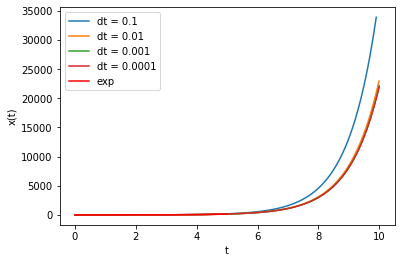

In [42]:
for dt in liste_dt :
    x1, t1 = solve_euler_implicite(f1, np.array([1]), dt, 0, 10)
    plt.plot(t1, x1, label = f"dt = {dt}")


t2 = np.linspace(0, 5, 1000)
plt.plot(t2, np.exp(t2), 'r', label = 'exp')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend();

On a vérifié la convergence du schéma d'Euler implicite 

In [47]:
x2, t2 = solve_euler_implicite(lotka, np.array([50, 15]), 0.01, 0, 150)

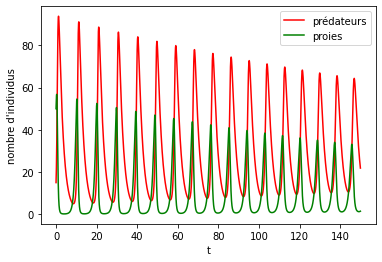

In [48]:
proies2 = np.array([X[0] for X in x2])
prédateurs2 = np.array([X[1] for X in x2])
plt.plot(t2, prédateurs2, 'r', label = 'prédateurs')
plt.plot(t2, proies2, 'g', label = 'proies')
plt.xlabel('t')
plt.ylabel("nombre d'individus")
plt.legend();


Encore une fois, on retrouve la même évolution cyclique des populations.

In [50]:
xconv, tconv = solve_euler_implicite(lotka, np.array([50, 15]), 0.01, 0, 1000)

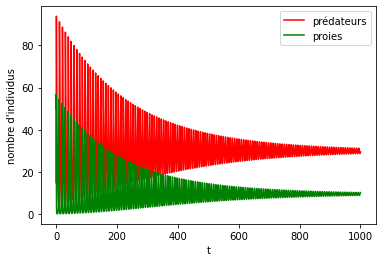

In [51]:
proiesconv = np.array([X[0] for X in xconv])
prédateursconv = np.array([X[1] for X in xconv])
plt.plot(tconv, prédateursconv, 'r', label = 'prédateurs')
plt.plot(tconv, proiesconv, 'g', label = 'proies')
plt.xlabel('t')
plt.ylabel("nombre d'individus")
plt.legend();


On remarque que les populations tendent vers les populations stables. Le schéma d'euler explicite est en fait divergent, alors que le schéma implicite permet de converger vers la position stable.

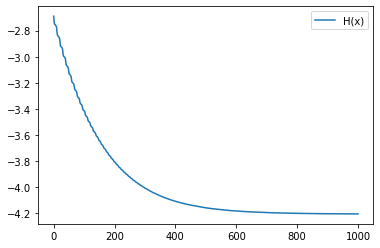

In [59]:
plt.plot(tconv, H(proiesconv, prédateursconv), label = 'H(x)')
plt.legend();

$\underline{\textbf{Question 9}} : $

On dispose d'un nouveau système :
$$
\left\{\begin{matrix}
\dot{x_1} = x_1(\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2) - H(x(0)))
\\ \dot{x_2} = -x_2(\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2) - H(x(0)))
\end{matrix}\right.
$$

Avec $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ de classe $C^1$ quelconque.

Montrons que les solutions de ce système sont exactement les solutions du système défini au départ.

- Soit $x$ une solution du premier système, avec $x_0 = x(0) \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Alors dans ce cas, $H$ est constante pour cette solution, donc on a $H(x_1,x_2) = H(x(0))$ à tout moment ! Donc le terme facteur de $u_1$ et $u_2$ s'annule, et $x$ est bien aussi solution du second système. Or comme ce second système est de la forme $\dot{x} = g(x)$ avec $g$ continûment différentiable car $H$ et $u$ le sont, cette solution est unique d'après Cauchy-Lipschitz !

- Or en prenant n'importe quelle solution $x$ du second système, il suffit de prendre la solution $x'$ du premier système avec $x'(0) = x(0)$ (son existence est assurée par le théorème de Cauchy-Lipschitz), et donc d'après ce qui précède, $x'$ est aussi solution du second système, et par unicité, $x' = x$ donc $x$ est aussi solution du premier système.

Ainsi, les solutions des deux systèmes sont les mêmes !

$\underline{\textbf{Question 10}} : $

Soit $H_0 \in \mathbb{R}$.

Pour ce nouveau système, on a : $\frac{d}{dt}(H-H_0) = \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2} =$ ... $ = (H-H_0)(\frac{\gamma u_1}{x_1} - \gamma u_1 - \beta u_2 + \frac{\alpha u_2}{x_2})$ après calcul.

Or d'après ce qu'on a vu avant : 

$\left \| \nabla H(x(t)) \right \|^2 = (\gamma - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2 = \gamma ^2 - 2\frac{\gamma \delta}{x_1} + \frac{\gamma ^2}{x_1^2} + \beta ^2 - 2\frac{\alpha \beta}{x_2} + \frac{\alpha ^2}{x_2^2}$.

On peut donc prendre, pour que l'équation de l'énoncé soit vérifiée :
- $u_1 = k(-\delta + \frac{\gamma}{x_1})$
- $u_2 = k(-\beta + \frac{\alpha}{x_2})$

Autrement dit, on prend $u(x(t)) = k\nabla H(x(t))$

On obtient alors : $\frac{d}{dt}(H(x(t)) - H_0) = -k\left \| \nabla H(x(t)) \right \|^2 (H(x(t)) - H_0)$ comme dans l'énoncé, que l'on peut transformer par $e^{k\int^{t}\left \| \nabla H(x(s)) \right \|^2 ds}(\frac{d}{dt}(H(x(t)) - H_0) + k\left \| \nabla H(x(t)) \right \|^2 (H(x(t)) - H_0)) = 0$

On reconnaît la dérivée d'un produit, donc : $\frac{d}{dt}(e^{k\int^{t}\left \| \nabla H(x(s)) \right \|^2 ds}(H(x(t)) - H_0)) = 0$, on peut alors intégrer l'expression et passer à la valeur absolue pour obtenir : $\left | H(x(t)) - H_0 \right | = \left | \lambda \right | e^{-k\int^{t}\left \| \nabla H(x(s)) \right \|^2 ds}$

Or si $x$ reste à une distance strictement positive de $\bar{x}$, alors, d'après la Q4, on peut minorer $\left \| \nabla H(x(t)) \right \|^2$ par un $\theta ^2$ strictement positif.

On en déduit alors : $\left | H(x(t)) - H_0 \right | \leq \left | \lambda \right | e^{-k \theta^2 t}$

Donc $H(x(t))$ converge bien exponentiellement vers $H_0$ si $x$ reste à une distance strictement positive de $\bar{x}$.

$\underline{\textbf{Question 11}} : $

On va exprimer $H(x^{j+1}) - H(x_0)$ au premier ordre en $dt$, on écrit $x^{j+1} - x^{j} = dt$ :

$H(x^{j+1}) = H(x^{j}) + \frac{dH(x(t))}{dt}dt = H(x^{j}) - k\left \| \nabla H(x^j) \right \|^2 dt(H(x^j) - H(x_0))$

Donc : $H(x^{j+1}) - H(x_0) = (H(x^{j}) - H(x_0))(1 - k\left \| \nabla H(x^j) \right \|^2 dt)$ !

Ainsi, même si $k$ règle la vitesse de convergence exponentielle comme on l'a vu à la question précédente, il ne peut être choisi arbitrairement grand car sinon l'écart entre $H(x^{j+1}) - H(x_0)$ et $H(x^{j}) - H(x_0)$ va grandir et on ne peut choisir un $dt$ arbitrairement petit pour compenser par manque d'une précision infinie sur un ordinateur.

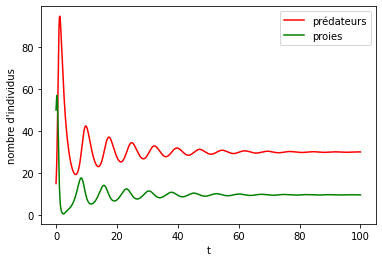

In [55]:
x0 = np.array([50, 15])
H0 = H(x0[0], x0[1])
k = 10


def lotka2(x, t):
    return np.array([x[0]*(alpha- beta*x[1]) - k*(-delta + gama/x[0])*(H(x[0], x[1]) - H0), -x[1]*(gama - delta*x[0]) - k*(-beta + alpha/x[1])*(H(x[0], x[1]) - H0)])

x3, t3 = solve_euler_implicite(lotka2, x0, 0.001, 0, 100)

proies3 = np.array([X[0] for X in x3])
prédateurs3 = np.array([X[1] for X in x3])
plt.plot(t3, prédateurs3, 'r', label = 'prédateurs')
plt.plot(t3, proies3, 'g', label = 'proies')
plt.xlabel('t')
plt.ylabel("nombre d'individus")
plt.legend();





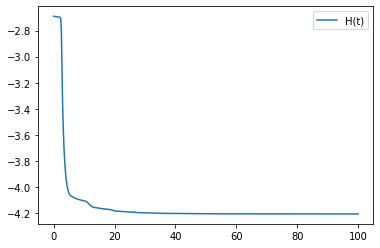

In [58]:
plt.plot(t3, H(proies3, prédateurs3), label = 'H(t)')
plt.legend();

Le nouveau schéma converge encore plus rapidement que l'ancien !